In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [4]:
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [6]:
df['yearmonth'] = pd.to_datetime("01-"+df['month'].astype(str)+"-"+df['year'].astype(str))
df.head()

,year,month,passengers,yearmonth
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


In [7]:
df.set_index('yearmonth',inplace=True)
df.head()

,year,month,passengers
yearmonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


<Axes: xlabel='yearmonth', ylabel='passengers'>

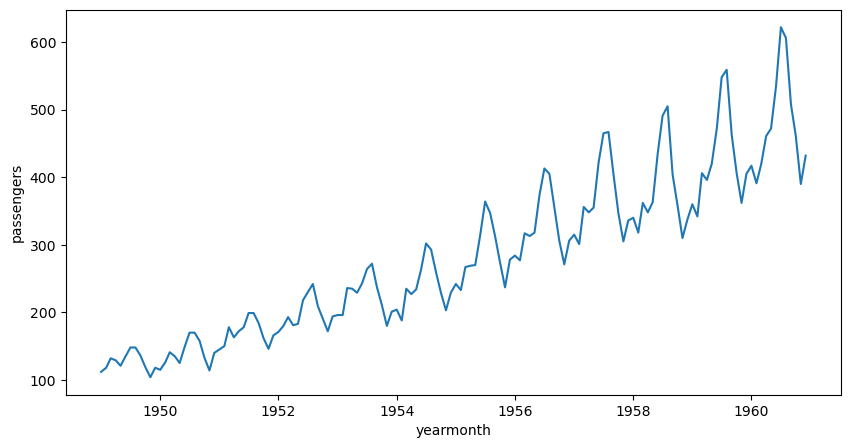

In [9]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.passengers)

In [10]:
df['rollmean'] = df.passengers.rolling(window=12).mean()
df['rollstd'] = df.passengers.rolling(window=12).std()

<Axes: xlabel='yearmonth', ylabel='passengers'>

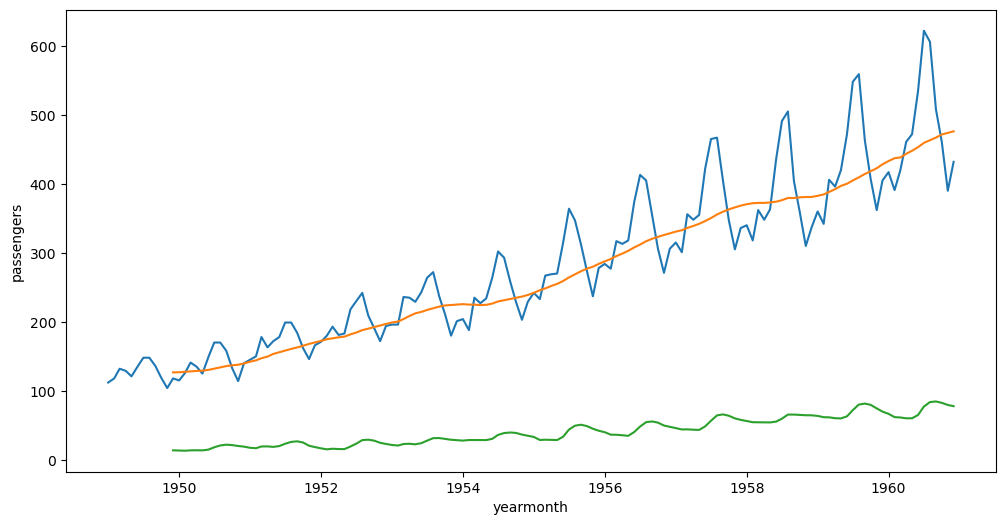

In [13]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x=df.index,y=df.passengers)
sns.lineplot(data=df,x=df.index,y=df.rollmean)
sns.lineplot(data=df,x=df.index,y=df.rollstd)

In [14]:
#ADF test
from statsmodels.tsa.stattools import adfuller

In [15]:
adfTest = adfuller(df['passengers'],autolag='AIC',)

In [16]:
adfTest

(0.8153688792060547,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [18]:
stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
stats

Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64

In [23]:
for key, values in adfTest[4].items():
    print('criticality',key,":",values)

criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


i am making hear one function

In [58]:
def test_stationarity(DataFrame, var):
    DataFrame['rollmean'] = DataFrame[var].rolling(window=12).mean()
    DataFrame['rollstd'] = DataFrame[var].rolling(window=12).std()
    
    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(DataFrame[var],autolag='AIC')
    stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
    print(stats)
    
    for key, values in adfTest[4].items():
        print('criticality',key,":",values)
        
    sns.lineplot(data=DataFrame,x=DataFrame.index,y=var)
    sns.lineplot(data=DataFrame,x=DataFrame.index,y='rollmean')
    sns.lineplot(data=DataFrame,x=DataFrame.index,y='rollstd')

In [59]:
df.head()

,year,month,passengers,rollmean,rollstd
yearmonth,,,,,
1949-01-01,1949,Jan,112,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN


Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


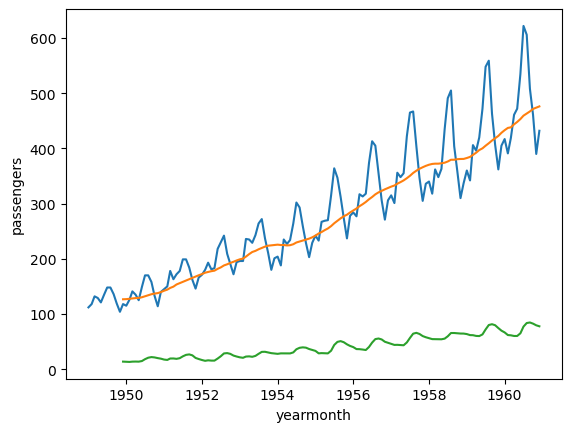

In [60]:
test_stationarity(df, 'passengers')

In [62]:
air_df = df[['passengers']]
air_df.head()

,passengers
yearmonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [63]:
# time shift

air_df['shift1'] = air_df.passengers.shift()
air_df['shiftdiff'] = air_df['passengers'] - air_df['shift1']
air_df.head()

C:\Users\yashs\AppData\Local\Temp\ipykernel_17452\4135096097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shift1'] = air_df.passengers.shift()
C:\Users\yashs\AppData\Local\Temp\ipykernel_17452\4135096097.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shiftdiff'] = air_df['passengers'] - air_df['shift1']


,passengers,shift1,shiftdiff
yearmonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0


C:\Users\yashs\AppData\Local\Temp\ipykernel_17452\1514819463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame['rollmean'] = DataFrame[var].rolling(window=12).mean()
C:\Users\yashs\AppData\Local\Temp\ipykernel_17452\1514819463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame['rollstd'] = DataFrame[var].rolling(window=12).std()


Test Statistic                  -2.829267
p-value                          0.054213
#lags used                      12.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


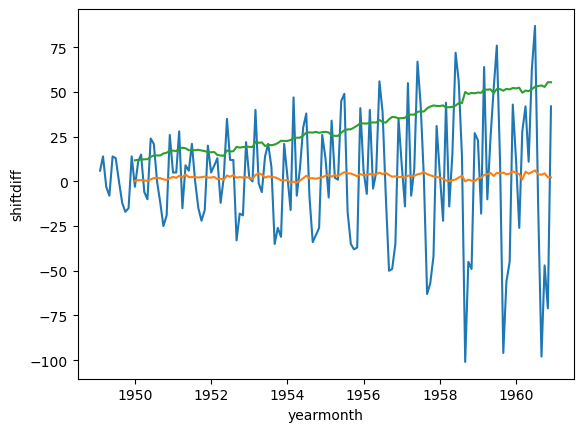

In [64]:
test_stationarity(air_df.dropna(),'shiftdiff')

In [65]:
# log
log_df = df[['passengers']]
log_df['log'] = np.log(log_df['passengers'])
log_df.head()

C:\Users\yashs\AppData\Local\Temp\ipykernel_17452\4281348066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df['log'] = np.log(log_df['passengers'])


,passengers,log
yearmonth,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


C:\Users\yashs\AppData\Local\Temp\ipykernel_17452\1514819463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame['rollmean'] = DataFrame[var].rolling(window=12).mean()
C:\Users\yashs\AppData\Local\Temp\ipykernel_17452\1514819463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame['rollstd'] = DataFrame[var].rolling(window=12).std()


Test Statistic                  -1.717017
p-value                          0.422367
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


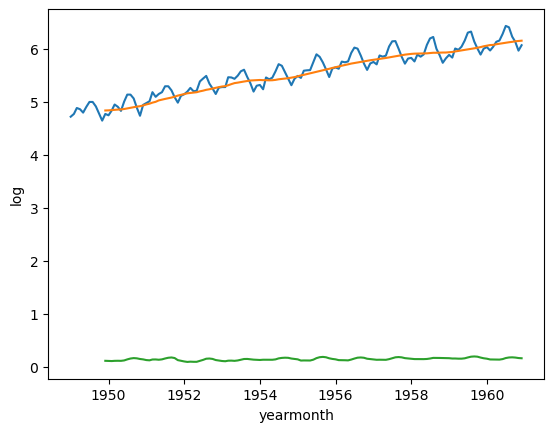

In [66]:
test_stationarity(log_df,'log')

In [67]:
sqrt_df = df[['passengers']]
sqrt_df['sqrt'] = np.sqrt(df['passengers'])
sqrt_df.head()

C:\Users\yashs\AppData\Local\Temp\ipykernel_17452\2486983579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqrt_df['sqrt'] = np.sqrt(df['passengers'])


,passengers,sqrt
yearmonth,,
1949-01-01,112,10.583005
1949-02-01,118,10.862780
1949-03-01,132,11.489125
1949-04-01,129,11.357817
1949-05-01,121,11.000000


C:\Users\yashs\AppData\Local\Temp\ipykernel_17452\1514819463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame['rollmean'] = DataFrame[var].rolling(window=12).mean()
C:\Users\yashs\AppData\Local\Temp\ipykernel_17452\1514819463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame['rollstd'] = DataFrame[var].rolling(window=12).std()


Test Statistic                  -0.345854
p-value                          0.918754
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


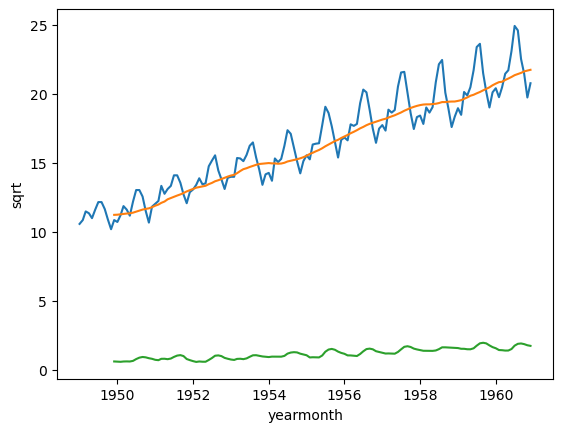

In [68]:
test_stationarity(sqrt_df, 'sqrt')

In [69]:
cbrt_df = df[['passengers']]
cbrt_df['cbrt'] = np.cbrt(df['passengers'])
cbrt_df.head()

C:\Users\yashs\AppData\Local\Temp\ipykernel_17452\1590778761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbrt_df['cbrt'] = np.cbrt(df['passengers'])


,passengers,cbrt
yearmonth,,
1949-01-01,112,4.820285
1949-02-01,118,4.904868
1949-03-01,132,5.091643
1949-04-01,129,5.052774
1949-05-01,121,4.946087


C:\Users\yashs\AppData\Local\Temp\ipykernel_17452\1514819463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame['rollmean'] = DataFrame[var].rolling(window=12).mean()
C:\Users\yashs\AppData\Local\Temp\ipykernel_17452\1514819463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame['rollstd'] = DataFrame[var].rolling(window=12).std()


Test Statistic                  -0.810035
p-value                          0.816157
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


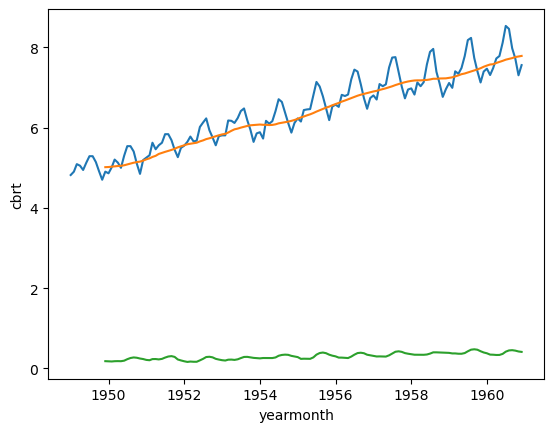

In [70]:
test_stationarity(cbrt_df, 'cbrt')

In [78]:
log_df2 = log_df[['passengers','log']]
log_df2['log_sqrt'] = np.sqrt(log_df['log'])
log_df2['logShiftDiff'] = log_df2['log_sqrt'] - log_df2['log_sqrt'].shift()
log_df2.head()

C:\Users\yashs\AppData\Local\Temp\ipykernel_17452\3089291636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df2['log_sqrt'] = np.sqrt(log_df['log'])


,passengers,log,log_sqrt,logShiftDiff
yearmonth,,,,
1949-01-01,112,4.718499,2.172211,NaN
1949-02-01,118,4.770685,2.184190,0.011979
1949-03-01,132,4.882802,2.209706,0.025517
1949-04-01,129,4.859812,2.204498,-0.005208
1949-05-01,121,4.795791,2.189929,-0.014569


C:\Users\yashs\AppData\Local\Temp\ipykernel_17452\1514819463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame['rollmean'] = DataFrame[var].rolling(window=12).mean()
C:\Users\yashs\AppData\Local\Temp\ipykernel_17452\1514819463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame['rollstd'] = DataFrame[var].rolling(window=12).std()


Test Statistic                  -3.071912
p-value                          0.028703
#lags used                      13.000000
number of observations used    118.000000
dtype: float64
criticality 1% : -3.4870216863700767
criticality 5% : -2.8863625166643136
criticality 10% : -2.580009026141913


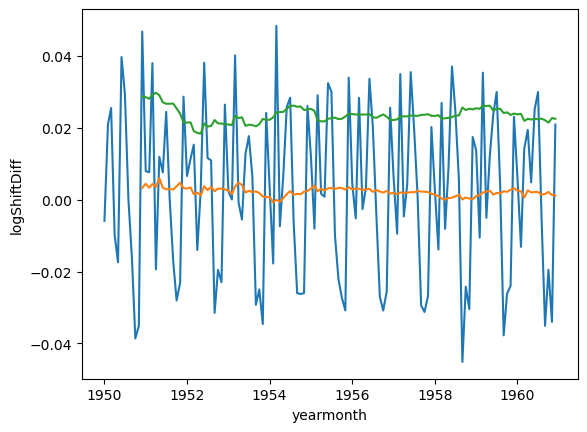

In [81]:
test_stationarity(log_df2.dropna(),'logShiftDiff')

In [82]:
log_df3 = log_df[['passengers','log']]
log_df3['log_cbrt'] = np.cbrt(log_df['log'])
log_df3['log_cbrtShiftDiff'] = log_df3['log_cbrt'] - log_df3['log_cbrt'].shift()
log_df3.head()

C:\Users\yashs\AppData\Local\Temp\ipykernel_17452\1261191997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df3['log_cbrt'] = np.cbrt(log_df['log'])


,passengers,log,log_cbrt,log_cbrtShiftDiff
yearmonth,,,,
1949-01-01,112,4.718499,1.677263,NaN
1949-02-01,118,4.770685,1.683424,0.006161
1949-03-01,132,4.882802,1.696510,0.013086
1949-04-01,129,4.859812,1.693843,-0.002667
1949-05-01,121,4.795791,1.686372,-0.007471


C:\Users\yashs\AppData\Local\Temp\ipykernel_17452\1514819463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame['rollmean'] = DataFrame[var].rolling(window=12).mean()
C:\Users\yashs\AppData\Local\Temp\ipykernel_17452\1514819463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame['rollstd'] = DataFrame[var].rolling(window=12).std()


Test Statistic                  -3.058048
p-value                          0.029818
#lags used                      13.000000
number of observations used    118.000000
dtype: float64
criticality 1% : -3.4870216863700767
criticality 5% : -2.8863625166643136
criticality 10% : -2.580009026141913


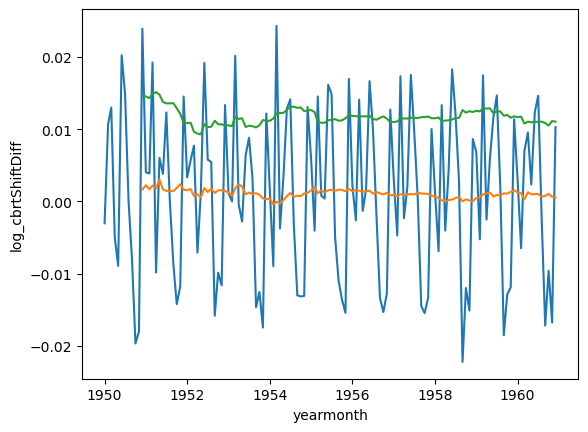

In [84]:
test_stationarity(log_df3.dropna(),'log_cbrtShiftDiff')

# arima sarima

In [88]:
airP = df[['passengers']].copy(deep=True)
airP['firstDiff'] = airP['passengers'].diff()
airP['Diff12'] = airP['passengers'].diff(12)


In [87]:
airP.head()

,passengers
yearmonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [110]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

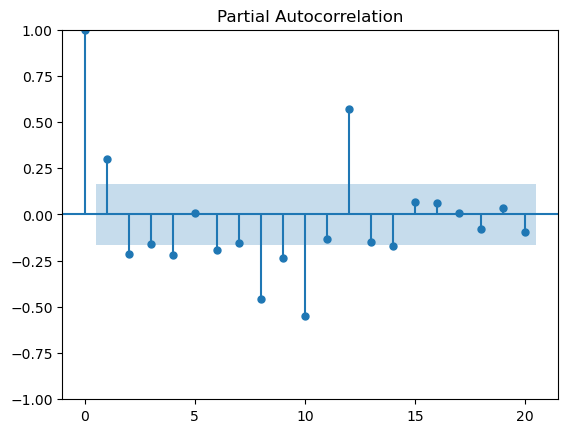

In [91]:
plot_pacf(airP['firstDiff'].dropna(),lags=20);

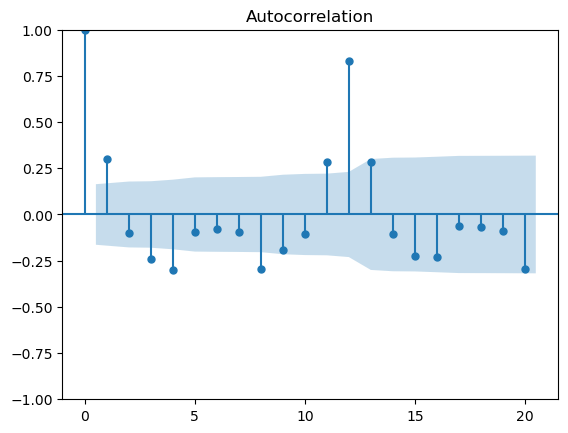

In [92]:
plot_acf(airP['firstDiff'].dropna(),lags=20);

In [93]:
# p = 1,q = 3, d = 1

In [106]:
train = airP[:round(len(airP)*70/100)]
test = airP[round(len(airP)*70/100):]
test.head()

,passengers,firstDiff,Diff12
yearmonth,,,
1957-06-01,422,67.0,48.0
1957-07-01,465,43.0,52.0
1957-08-01,467,2.0,62.0
1957-09-01,404,-63.0,49.0
1957-10-01,347,-57.0,41.0


In [111]:
from statsmodels.tsa.arima.model import ARIMA

In [112]:
model = ARIMA(train['passengers'],order=(1,1,3))

C:\Users\yashs\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [117]:
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
airP['arimapred'] = prediction
airP.tail(12)

,passengers,firstDiff,Diff12,arimapred
yearmonth,,,,
1960-01-01,417,12.0,57.0,341.111334
1960-02-01,391,-26.0,49.0,341.111334
1960-03-01,419,28.0,13.0,341.111333
1960-04-01,461,42.0,65.0,341.111333
1960-05-01,472,11.0,52.0,341.111333
1960-06-01,535,63.0,63.0,341.111333
1960-07-01,622,87.0,74.0,341.111333
1960-08-01,606,-16.0,47.0,341.111333
1960-09-01,508,-98.0,45.0,341.111333


<Axes: xlabel='yearmonth', ylabel='passengers'>

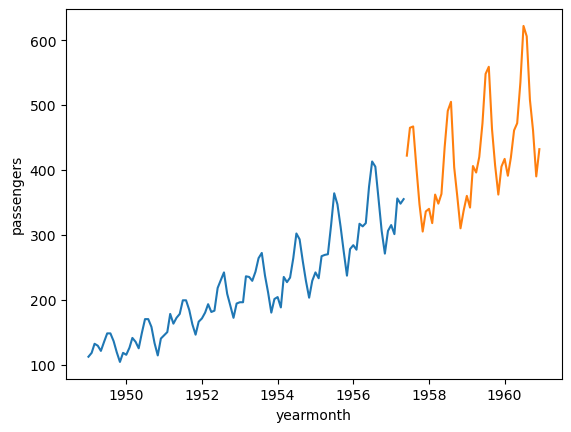

In [121]:
sns.lineplot(data=train,x=train.index,y=train.passengers)
sns.lineplot(data=test, x=test.index,y=test.passengers)

<Axes: xlabel='yearmonth', ylabel='passengers'>

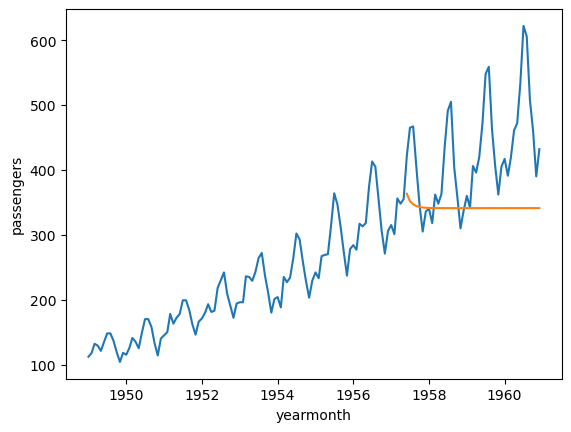

In [124]:
airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='arimapred')


In [125]:
from sklearn.metrics import mean_squared_error

In [126]:
np.sqrt(mean_squared_error(test['passengers'],prediction))

111.11010325919229

In [127]:
#sarima

In [132]:
from statsmodels.tsa.arima.model import sarimax

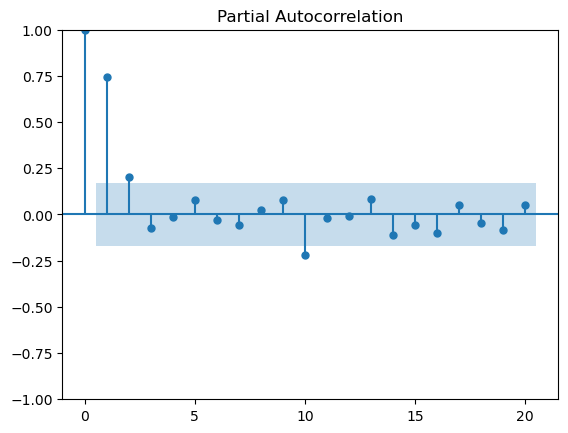

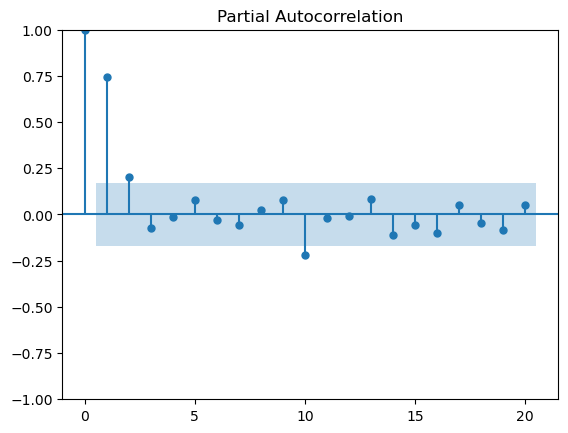

In [142]:
plot_pacf(airP['Diff12'].dropna(),lags=20)

In [172]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['passengers'], order=(2, 1, 2), seasonal_order=(2, 1, 2, 12))


C:\Users\yashs\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [173]:
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
airP['sarimaxPred'] = prediction

C:\Users\yashs\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [174]:
airP.tail()

,passengers,firstDiff,Diff12,arimapred,sarimaxPred
yearmonth,,,,,
1960-08-01,606,-16.0,47.0,341.111333,595.420437
1960-09-01,508,-98.0,45.0,341.111333,530.600720
1960-10-01,461,-47.0,54.0,341.111333,475.158237
1960-11-01,390,-71.0,28.0,341.111333,427.866793
1960-12-01,432,42.0,27.0,341.111333,472.864573


<Axes: xlabel='yearmonth', ylabel='passengers'>

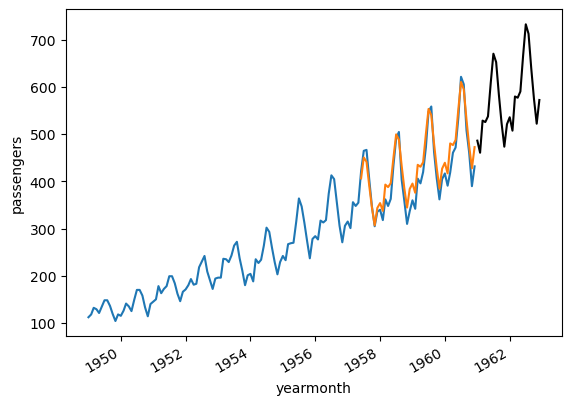

In [184]:
airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='sarimaxPred')
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot(color='black')

In [176]:
np.sqrt(mean_squared_error(test['passengers'],prediction))

25.989813041168524

In [177]:
airP.tail()

,passengers,firstDiff,Diff12,arimapred,sarimaxPred
yearmonth,,,,,
1960-08-01,606,-16.0,47.0,341.111333,595.420437
1960-09-01,508,-98.0,45.0,341.111333,530.600720
1960-10-01,461,-47.0,54.0,341.111333,475.158237
1960-11-01,390,-71.0,28.0,341.111333,427.866793
1960-12-01,432,42.0,27.0,341.111333,472.864573


In [181]:
futureDate = pd.DataFrame(pd.date_range(start='1961-01-01', end='1962-12-01',freq='MS'),columns=['Dates'])
futureDate.set_index('Dates',inplace=True)
futureDate.head()

""
Dates
1961-01-01
1961-02-01
1961-03-01
1961-04-01
1961-05-01


<Axes: >

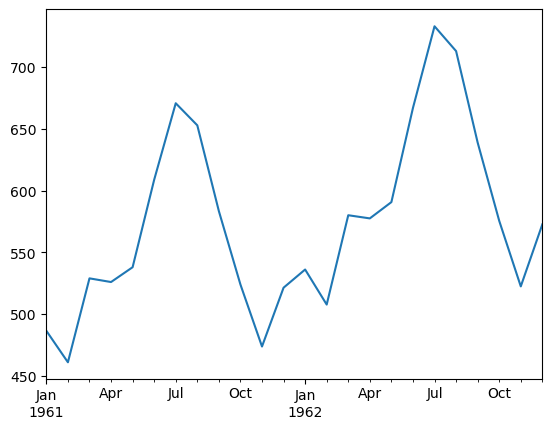

In [183]:
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot()